In [ ]:
from libraries import lib
from libraries.NeuralStates import *
import qutip as qt
import torch.nn as nn 
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
def bitflip_x(x, N, flips):
    new_x = x
    for _ in range(flips):
        new_x = x ^ (1 << npr.randint(0, N))
    return new_x

In [3]:
num_epochs = 10
data_rate = 1

In [4]:
N = 50
J = 1

In [5]:
Gamma = 10

In [6]:
num_samples = 1500

In [7]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
    if epoch % 1 == 0:
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data)) # this takes like 20s per epoch

0 tensor(-500.3163, grad_fn=<SelectBackward0>)
1 tensor(-499.4125, grad_fn=<SelectBackward0>)
2 tensor(-499.0157, grad_fn=<SelectBackward0>)
3 tensor(-501.4375, grad_fn=<SelectBackward0>)
4 tensor(-499.4005, grad_fn=<SelectBackward0>)
5 tensor(-501.2735, grad_fn=<SelectBackward0>)
6 tensor(-499.6487, grad_fn=<SelectBackward0>)
7 tensor(-500.1386, grad_fn=<SelectBackward0>)
8 tensor(-500.3001, grad_fn=<SelectBackward0>)
9 tensor(-500.2963, grad_fn=<SelectBackward0>)
-500.2962951660156
-501.4375305175781


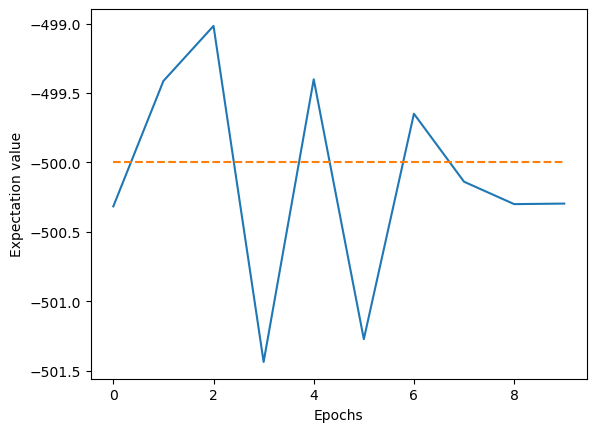

In [10]:
# ground state energy about -10N
plt.plot(epochs, loss_data)
plt.plot([0, epochs[-1]], [-10 * N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [5]:
Gamma = 0.1

In [ ]:
num_samples = 8000
num_epochs = 10
# 1500 samples 10 epochs went to -41 then to nan
# 2500 samples 10 epochs went to -6.35 at the end
# 3500 samples 15 epochs had min -6.16 did not converge
# 5000 samples 10 epochs went to -34 then nan
# 8000 samples crashed vscode

In [ ]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
    if epoch % 1 == 0:
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-5.0296, grad_fn=<SelectBackward0>)
1 tensor(-4.9488, grad_fn=<SelectBackward0>)
2 tensor(-5.2905, grad_fn=<SelectBackward0>)
3 tensor(-4.7277, grad_fn=<SelectBackward0>)


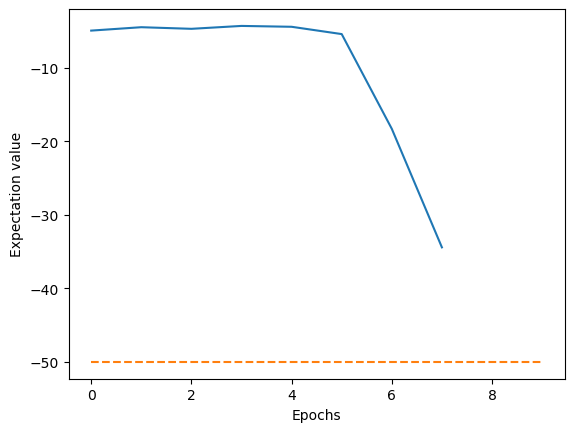

In [ ]:
# ground state energy about -N
plt.plot(epochs, loss_data)
plt.plot([0, epochs[-1]], [-N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()